In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm
from sklearn.metrics import mean_squared_error

In [2]:
weather_df= pd.read_csv("../data/weather_data.csv")

In [3]:
weather_df

,date,maxtempC,mintempC,avgtempC,sunHour,humidity,pressure
0,2018-01-01,8,6,7,5.0,69,999
1,2018-01-02,12,4,8,2.0,81,1005
2,2018-01-03,12,7,9,8.0,60,996
3,2018-01-04,12,7,8,1.0,78,995
4,2018-01-05,9,4,7,8.0,73,995
...,...,...,...,...,...,...,...
2186,2023-12-27,12,7,10,1.0,83,1008
2187,2023-12-28,11,9,11,1.0,72,1006
2188,2023-12-29,10,6,9,7.0,73,1007
2189,2023-12-30,11,6,9,1.0,80,1005


In [4]:
weather_df['date'] = pd.to_datetime(weather_df['date'])
weather_df.set_index('date', inplace=True)

In [5]:
weather_df['avgtempC'] = weather_df['avgtempC'].astype(int)
weather_df['maxtempC'] = weather_df['maxtempC'].astype(int)
weather_df['mintempC'] = weather_df['mintempC'].astype(int)
weather_df['humidity'] = weather_df['humidity'].astype(int)
weather_df['pressure'] = weather_df['pressure'].astype(int)

In [6]:
temp_df = weather_df['avgtempC']

In [7]:
train_df = temp_df['2018':'2022'].resample('M').mean().fillna(method='pad')
test_df = temp_df['2023':'2024'].resample('M').mean().fillna(method='pad')

/var/folders/g2/yfkj5x354bg2wg_5t6jzg9_80000gn/T/ipykernel_78842/3098915856.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_df = temp_df['2018':'2022'].resample('M').mean().fillna(method='pad')
/var/folders/g2/yfkj5x354bg2wg_5t6jzg9_80000gn/T/ipykernel_78842/3098915856.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_df = temp_df['2023':'2024'].resample('M').mean().fillna(method='pad')


In [8]:
model = pm.auto_arima(train_df, seasonal=True, m=12)

In [9]:
forecast = model.predict(n_periods=len(test_df))

In [10]:
forecast = pd.DataFrame(forecast,index = test_df.index,columns=['Prediction'])

In [11]:
forecast

,Prediction
date,
2023-01-31,4.018545
2023-02-28,6.526286
2023-03-31,8.239412
2023-04-30,8.550236
2023-05-31,12.071899
2023-06-30,17.002471
2023-07-31,18.895639
2023-08-31,18.360001
2023-09-30,16.380599


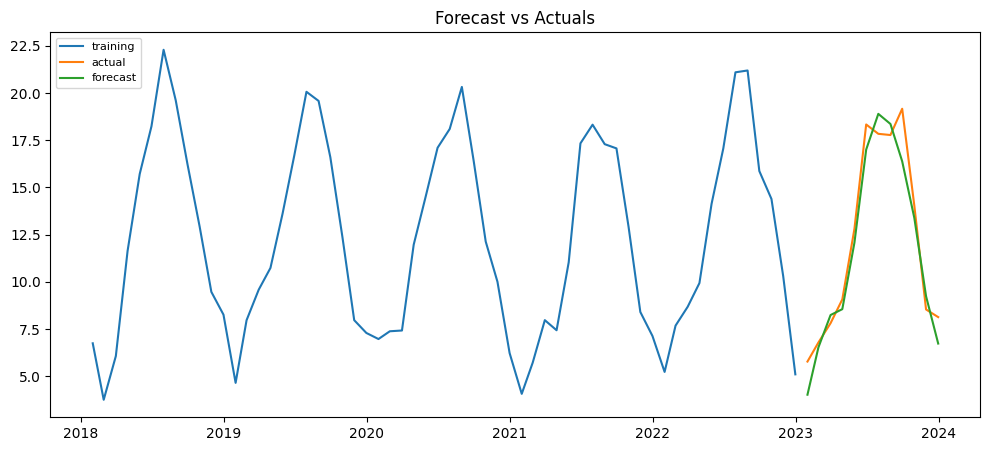

In [12]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_df, label='training')
plt.plot(test_df, label='actual')
plt.plot(forecast, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

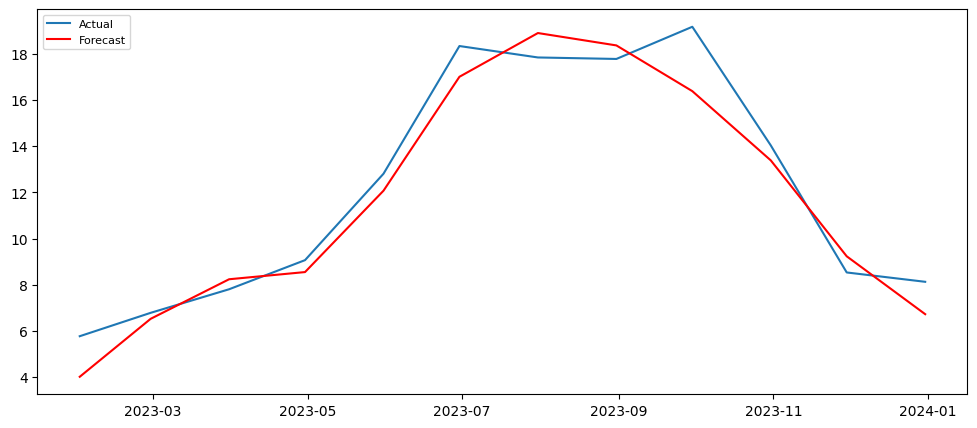

In [13]:
plt.figure(figsize=(12,5), dpi=100)
plt.plot(test_df, label='Actual')
plt.plot(forecast, label='Forecast', color='red')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [14]:
error = mean_squared_error(test_df, forecast)
print('Test Mean Squared Error: ',error)

Test Mean Squared Error:  1.5008102002582422
